# Maximum-likelihood estimate for mean lifetime in radiactive decay

## Tasks

a) The maximum likelihood estimator for the mean lifetime $\tau$ of a radioactive decay desribed by the distribution

$$ f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$

is give by 

$$\hat \tau = \frac{1}{n} \sum_{i=1}^n t_i.$$

The standard deviation of $\hat \tau$ can be estimated as 

$$\sigma_\tau^2 = - \left(\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-1}$$

Use that to show that the uncertainty of $\hat \tau$ is given by $\sigma_\tau = \frac{\hat \tau}{\sqrt{n}}$

b) Use the function *generate_data* defined below to generate a data set with 30 and 300 samples for $\tau = 2$, respectively. Plot the log-likelihood function $\ln L(\tau)$ along with the parabolic approximation. 

$$ \ln L(\tau) \approx \ln L_\mathrm{max} - \frac{(\tau - \hat \tau)^2}{2 \sigma^2}$$

What can you conclude about the validity of the approximtion as the sample size increases?

c) Generate 1000 data sets each with 500 samples for $\tau = 2$ and determine for each data set whether the true value of tau lies in the interval $[\hat \tau - \sigma_{\hat \tau}, \hat \tau + \sigma_{\hat \tau}]$. How often does the true value lie in this interval? What is your expection for the correspinding probability?


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.


## Solution

In [75]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2525)

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = 8, 8
plt.rcParams["figure.titlesize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (1., 1., 1.)
plt.rcParams["axes.edgecolor"] = (.0, .0, .0)
plt.rcParams["scatter.marker"] = "."
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.color"] = (0,0,0)
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"] = (1., 1., 1.)
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = False

#packages and plot styles

a) The uncertainty of $\tau$ is calculated as follows:
$$\begin{eqnarray}
L(\tau) &=& \prod_{i=1}^{n}{f(t_i, \tau)} = \prod_{i=1}^{n} \frac{1}{\tau}e^{-t_i/\tau}\\
\ln{\left(L(\tau)\right)} &=& \ln{\left(\prod_{i=1}^{n} \frac{1}{\tau}e^{-t_i/\tau}\right)} = \sum_{i=1}^{n}{\ln{\left(\frac{1}{\tau}e^{-t_i/\tau}\right)}} = -n\ln(\tau)-\frac{1}{\tau}\sum_{i=1}^n{t_i}\\
\frac{\partial^2 \ln L(\tau)}{\partial \tau^2} &=& \frac{\partial^2}{\partial \tau^2}(-n\ln(\tau)-\frac{1}{\tau}\sum_{i=1}^n{t_i}) = -n\frac{\partial^2\ln(\tau)}{\partial \tau^2}-\sum_{i=1}^n{t_i}\frac{\partial^2\tau^{-1}}{\partial \tau^2} = \frac{n}{\tau^2}-\sum_{i=1}^n{t_i}\frac{2}{\tau^3}\\
\frac{\partial^2 \ln L(\tau)}{\partial \tau^2}\Big|_{\tau = \hat \tau} &=& \frac{n}{{\hat \tau}^2}-\sum_{i=1}^n{t_i}\frac{2}{{\hat \tau}^3} = \frac{n}{{\hat \tau}^2}-n{\hat \tau}\frac{2}{{\hat \tau}^3} = -\frac{n}{{\hat \tau}^2}\\
\sigma_\tau &=& \left(-\frac{\partial^2 \ln L(\tau)}{\partial^2 \tau} \Big|_{\tau = \hat \tau} \right)^{-\frac{1}{2}}= \left(\frac{n}{{\hat\tau}^2}\right)^{-\frac{1}{2}} = \frac{\hat\tau}{\sqrt{n}}
\end{eqnarray}$$

In [76]:
def generate_data(tau, n_samples):
    return np.random.exponential(tau, n_samples)

# function for data generation given by task


def lnL(taus, t):
    return - len(t) * np.log(taus) - t.sum() / taus

# function for log-likelihood as derived above


def lnL_est(taus, t):
    return lnL(taus, t).max() - .5 * len(t) * ( taus / t.mean() - 1 )**2

# function parabolic approximation of log-likelihood function

b) Plots:

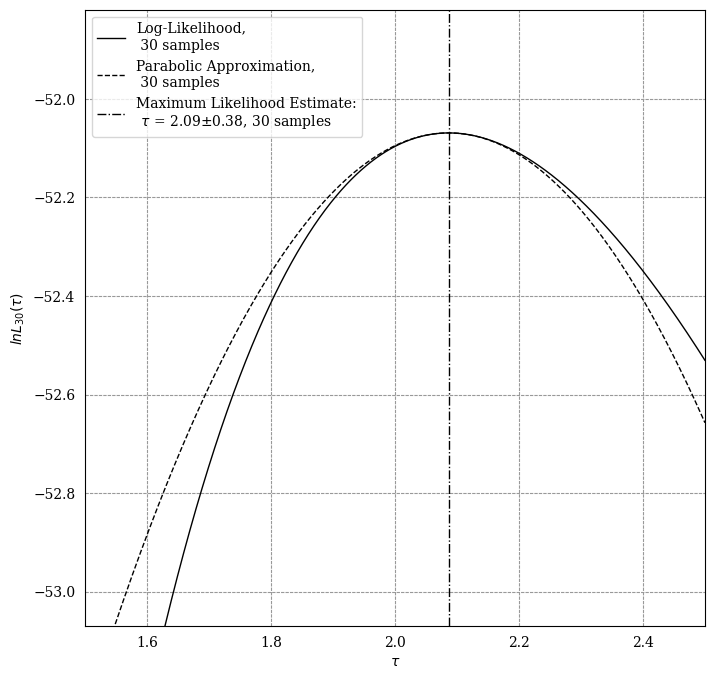

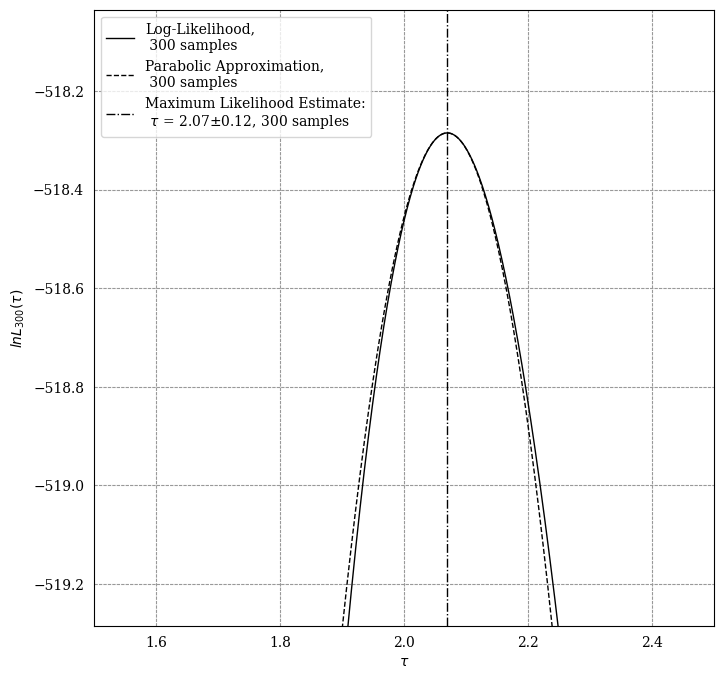

In [89]:
tau, d_tau = 2, .5
taus = np.linspace(tau-d_tau, tau+d_tau, 1000)
n_samples = [30, 300]
# tau and sample sizes given by task, tau range chosen arbitrarily

np.random.seed(99)

for i in range(len(n_samples)):
    t = generate_data(tau, n_samples[i])
    L = lnL(taus, t)
    L_ = lnL_est(taus, t)
    L_err = 1-L_/L
    #calculation for each sample size
    
    plt.plot(taus, L, label=f"Log-Likelihood,\n {n_samples[i]:.0f} samples")
    plt.plot(taus, L_, ls="--", label=f"Parabolic Approximation,\n {n_samples[i]:.0f} samples")
    plt.vlines(t.mean(), L_.max()-1, L_.max()+.25,ls="-.",  label=f"Maximum Likelihood Estimate:\n $\\tau$ = {t.mean():.2f}$\pm${t.mean() / np.sqrt(n_samples[i]):.2f}, {n_samples[i]:.0f} samples", color="r")
    plt.ylabel(f"$lnL_{ {n_samples[i]} }$"+r"$(\tau)$")
    plt.xlabel(r"$\tau$")
    plt.ylim(L_.max()-1,L_.max()+.25)
    plt.xlim(taus.min(),taus.max())
    plt.legend()
    plt.show()

    # plt.plot(taus, L_err, label=f"Relative Error of Parabolic Approximation,\n {n_samples[i]:.0f} samples")
    # plt.vlines(t.mean(), L_err.min(), L_err.max(), label=f"Maximum Likelihood Estimate:\n $\\tau$ = {t.mean():.2f}$\pm${t.mean() / np.sqrt(n_samples[i]):.2f}, {n_samples[i]:.0f} samples", color="r")
    # plt.ylabel(f"$\Delta lnL_{ {n_samples[i]} }"+r"$(\tau)$"+"\ /\ lnL_{ {n_samples[i]} }$"+r"$(\tau)$")
    # plt.xlabel(r"$\tau$")
    # plt.ylim(L_err.min(),L_err.max())
    # plt.xlim(taus.min(),taus.max())
    # plt.legend()
    # plt.show()
#plot

c):

In [74]:
tau, n_datasets, n_samples, sigma = 2, 1000, 500, 1
t = generate_data(tau, (n_datasets, n_samples))
p = ( np.abs(tau - t.mean(1)) < sigma * t.mean(1) / np.sqrt(n_samples) ).mean()
print(f"""For {n_datasets} datasets with {n_samples} samples, {p:.2%}\
 of the estimate values have the true tau within a {sigma} sigma range.""")

For 1000 datasets with 500 samples, 66.50% of the estimate values have the true tau within a 1 sigma range.


This is consistent with a Gaussian distribution. Since radioactive decay corresponds to a binomial distribution and can be approximated with a Gaussian curve for larger measurements, no new insight is gained here. Furthermore, with the central limit theorem, one expects that the sum of samples of the same distribution converges to a Gaussian distribution. The original distribution $$f(t, \tau) = \frac{1}{\tau} e^{-t/\tau}$$ is the same for all $t_i$ and the sum with $1000$ elements is large enough to apply the central limit theorem.